Reference:
https://qiita.com/tnozoo/items/000528b2001fe629ced4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [3]:
# 12か月チャート
month = 12
# チャートの基本設定
kwargs = dict(type = 'candle', style = 'yahoo') ## starsandstripes, yahoo

code = 'N225'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
_df = ticker.history(period='1y')
_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-28 00:00:00+09:00,39189.218750,39283.949219,39075.468750,39208.031250,119900000,0.0,0.0
2024-02-29 00:00:00+09:00,38935.531250,39250.121094,38876.808594,39166.191406,166000000,0.0,0.0
2024-03-01 00:00:00+09:00,39254.691406,39990.230469,39224.640625,39910.820312,122800000,0.0,0.0
2024-03-04 00:00:00+09:00,40201.761719,40314.640625,40001.550781,40109.230469,119400000,0.0,0.0
2024-03-05 00:00:00+09:00,39881.730469,40226.988281,39840.339844,40097.628906,115200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-20 00:00:00+09:00,38942.910156,38967.011719,38468.718750,38678.039062,125200000,0.0,0.0
2025-02-21 00:00:00+09:00,38523.070312,38808.808594,38456.531250,38776.941406,130100000,0.0,0.0
2025-02-25 00:00:00+09:00,38359.671875,38485.949219,38131.789062,38237.789062,132900000,0.0,0.0


In [5]:
# 取得したデータの次の日から26日先までが欠損値の DataFrame を作り結合する
next_day = _df.index[-1] + relativedelta(days = 1)
_df_26 = pd.DataFrame(data=np.full(shape=26 * len(_df.columns), fill_value=np.nan).reshape(26, len(_df.columns)),
        columns=_df.columns, index=pd.date_range(next_day, periods=26, freq='D'))
df = pd.concat([_df, _df_26])
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2024-02-28 00:00:00+09:00,39189.218750,39283.949219,39075.468750,39208.031250,119900000.0,0.0,0.0
2024-02-29 00:00:00+09:00,38935.531250,39250.121094,38876.808594,39166.191406,166000000.0,0.0,0.0
2024-03-01 00:00:00+09:00,39254.691406,39990.230469,39224.640625,39910.820312,122800000.0,0.0,0.0
2024-03-04 00:00:00+09:00,40201.761719,40314.640625,40001.550781,40109.230469,119400000.0,0.0,0.0
2024-03-05 00:00:00+09:00,39881.730469,40226.988281,39840.339844,40097.628906,115200000.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-22 00:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-23 00:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-24 00:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-25 00:00:00+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def ichimoku(o, h, l, c):
    ## 当日を含めた過去26日間の最高値
    max26 = h.rolling(window=26).max()
    ## 当日を含めた過去 9日間の最高値
    max9  = h.rolling(window=9).max()
    ## 当日を含めた過去52日間の最高値
    max52 = h.rolling(window=52).max()

    ## 当日を含めた過去26日間の最安値
    min26 = l.rolling(window=26).min()
    ## 当日を含めた過去 9日間の最安値
    min9  = l.rolling(window=9).min()
    ## 当日を含めた過去52日間の最安値
    min52 = l.rolling(window=52).min()

    ## 基準線=（当日を含めた過去26日間の最高値+最安値）÷2
    kijun = (max26 + min26) / 2
    ## 転換線=（当日を含めた過去9日間の最高値+最安値）÷2
    tenkan = (max9 + min9) / 2
    ## 先行スパン1=｛（転換値+基準値）÷2｝を26日先行させて表示
    senkospan1 = (kijun + tenkan) / 2
    senkospan1 = senkospan1.shift(26)
    ## 先行スパン2=｛（当日を含めた過去52日間の最高値+最安値）÷2｝を26日先行させて表示
    senkospan2 = (max52 + min52) / 2
    senkospan2 = senkospan2.shift(26)
    ## 遅行スパン= 当日の終値を26日遅行させて表示
    chikouspan = c.shift(-26)

    return kijun, tenkan, senkospan1, senkospan2, chikouspan

In [7]:
# float 型に
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
o = df['Open']
c = df['Close']
l = df['Low']
h = df['High']

In [8]:
'''
テクニカル指標の結果を得る
'''
# 一目均衡表
kijun, tenkan, senkospan1, senkospan2, chikouspan = ichimoku(o, h, l, c)

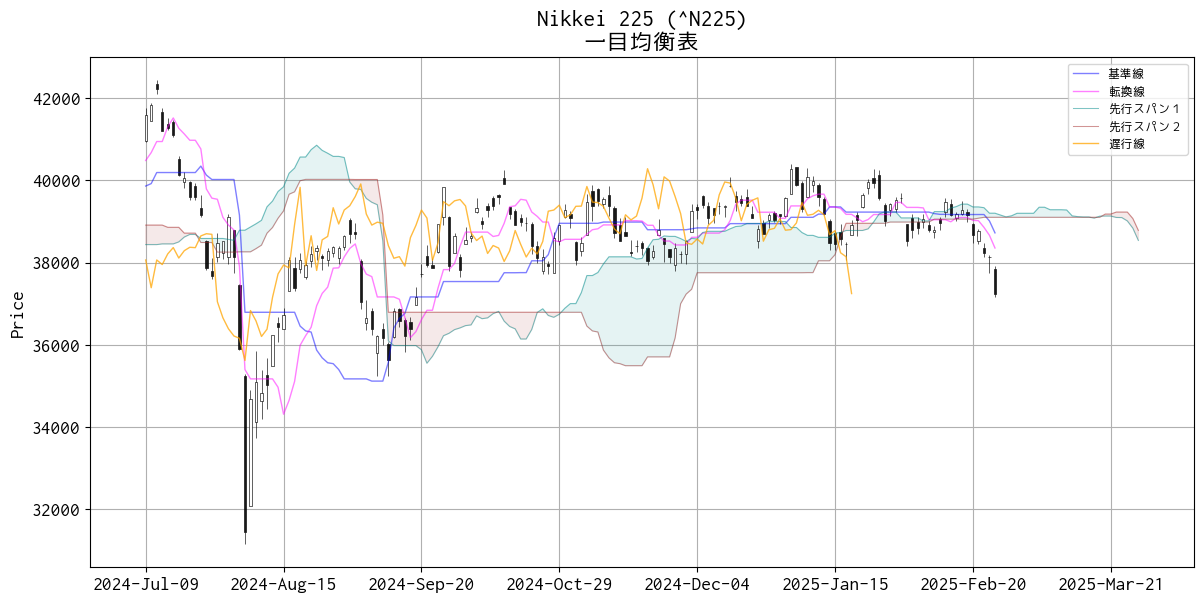

In [9]:
l = len(df)
mid = list(df.index)[int(l / 3)]
idx_mid = list(df.index).index(mid)

'''
チャートを描く
'''
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(12, 6))

# プロットを作成する(ボリンジャーバンド，MACD，RSI，一目均衡表)
apds = [
    mpf.make_addplot(kijun[mid:], color='blue', alpha=0.5, width=1, label='基準線', ax=ax),
    mpf.make_addplot(tenkan[mid:], color='magenta', alpha=0.5, width=1, label='転換線', ax=ax),
    mpf.make_addplot(senkospan1[mid:], color='darkcyan', alpha=0.5, width=0.75, label='先行スパン１', ax=ax),
    mpf.make_addplot(senkospan2[mid:], color='brown', alpha=0.5, width=0.75, label='先行スパン２', ax=ax),
    mpf.make_addplot(chikouspan[mid:], color='orange', alpha=0.75, width=1, label='遅行線', ax=ax)
]

# 一目均衡表(axes=1)の先行スパン１と先行スパン２の間を塗りつぶす
y1 = senkospan1[mid:].values
y2 = senkospan2[mid:].values
fb_span1 = dict(y1=y1, y2=y2, where=y1>y2, alpha=0.1, color='darkcyan', interpolate=True)
fb_span2 = dict(y1=y1, y2=y2, where=y1<y2, alpha=0.1, color='brown', interpolate=True)
fb_span_both = [fb_span1, fb_span2]
ax.fill_between(x=range(0, len(df.index) - idx_mid), **fb_span1)
ax.fill_between(x=range(0, len(df.index) - idx_mid), **fb_span2)

# ローソク足を描く，用意したプロットを渡す
mpf.plot(
    df[mid:],
    style='default',
    type='candle',
    xrotation=0,
    addplot=apds,
    ax=ax,
)

ax.set_title('%s (%s)\n一目均衡表' % (ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid('both')

plt.subplots_adjust(left=0.01, right=0.93, bottom=0.05, top=0.90)
plt.savefig('daily_chart_ichimoku_%s.png' % code)

plt.show()

In [10]:
df.iloc[len(df) - 28:len(df) - 26][['Open', 'High', 'Low', 'Close']]

,Open,High,Low,Close
2025-02-26 00:00:00+09:00,38143.679688,38175.238281,37742.761719,38142.371094
2025-02-28 00:00:00+09:00,37853.480469,37925.281250,37164.609375,37246.281250
